# Augmentations

In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import numpy as np
import trimesh

from util.visualization_utils import * 

1. Princeton Segmentation Benchmark

In [30]:
# Load one sample and visualize
sample = trimesh.load("./data/MeshsegBenchmark-1.0/data/off/1.off")
visualize_mesh(sample)

/home/umur/anaconda3/envs/dl/lib/python3.8/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float32" does not match required type "float32". A coerced copy has been created.
  warnings.warn(
/home/umur/anaconda3/envs/dl/lib/python3.8/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "uint32" does not match required type "uint32". A coerced copy has been created.
  warnings.warn(


Output()

In [31]:
# Sample points from the given mesh to create a pointcloud
res = 20
points, face_indices = trimesh.sample.sample_surface(sample,res**3)
visualize_pointcloud(points)

Output()

## Scale

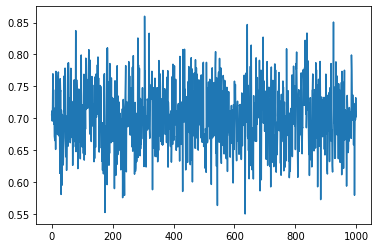

In [4]:
import matplotlib.pyplot as plt
plt.plot(np.random.normal(0.7, 0.05, 1000))

In [5]:
def scale(points):
    """
    Scales the object. The scale value is sampled from a normal distribution 
    with 0.7 mean and 0.05 variance

    Parameters
    ----------

    points (ndarray): 3D object
    
    Returns
    -------

    out (ndarray) : Augmentated 3D object
    """
    points_temp = points.copy()
    scale = np.random.normal(0.7, 0.05, 1)
    points_temp = points_temp*scale
    return points_temp
    
visualize_pointcloud(scale(points))

Output()

## Flip

In [6]:
def flip(points):
    """
    Flip the object over x or y axis.

    Parameters
    ----------

    points (ndarray): 3D object
    
    Returns
    -------

    out (ndarray) : Augmentated 3D object
    """
    points_temp = points.copy()
    index = np.random.choice(2, 1)
    points_temp[:,index] = -points_temp[:,index]
    return points_temp
    
visualize_pointcloud(flip(points))

Output()

## Gaussian Noise

In [32]:
def gaussian_white_noise(points):
    """
    Additive Gaussian white noise with zero mean and 0.008 variance.

    Parameters
    ----------

    points (ndarray): 3D object
    
    Returns
    -------

    out (ndarray) : Augmentated 3D object
    """
    points_temp = points.copy()
    GAUSS_NOISE_MU = 0
    GAUSS_NOISE_SIGMA = 0.008
    
    noise = np.random.normal(GAUSS_NOISE_MU, GAUSS_NOISE_SIGMA, points.shape)
    return points_temp + noise

visualize_pointcloud(gaussian_white_noise(points))

Output()

## Cutout

In [102]:
def cutout(points, cut_ratio=0.1):
    """
    Cuts a portion of the object.

    Parameters
    ----------

    points (ndarray): 3D object
    
    Returns
    -------

    out (ndarray) : Augmentated 3D object
    """
    points_temp = points.copy()
    
    for axis in range(3):
        max_val, min_val = np.max(points_temp.T[axis]), np.min(points_temp.T[axis])
        cut_len = np.abs(max_val-min_val)*cut_ratio
        start_pos = np.random.uniform(min_val,max_val-cut_len,1)
        positions = (start_pos, start_pos + cut_len)
        indices = np.where((points_temp.T[axis]>positions[0]) & (points_temp.T[axis]<positions[1]))
        points_temp = np.delete(points_temp, indices, axis=0)
        
    # TODO: Resample to 8000
    
    return points_temp

visualize_pointcloud(cutout(points))

0.07234417377880069 0.3640460373801863 -0.35939570040782054
(array([0.28636982]), array([0.35871399]))
(7805, 3)
0.02921594372309441 0.15440688907429123 -0.13775254815665286
(array([0.10124137]), array([0.13045732]))
(7560, 3)
0.17948471071700256 0.8151793170499889 -0.9796677901200367
(array([-0.16511526]), array([0.01436945]))
(6549, 3)


Output()

## Rotation

In [197]:
from scipy.linalg import expm, norm

def M(axis, theta):
    return expm(np.cross(np.eye(3), axis/norm(axis)*theta))

def rotate(points):
    points_temp = points.copy()
    axis, theta = [4,4,1], np.random.uniform(0,10,1)
    rotation_matrix = M(axis, theta)
    return np.dot(rotation_matrix,points_temp.T).T

visualize_pointcloud(rotate(points))

Output()